<a href="https://colab.research.google.com/github/ivinitus/Cashflow-forecasting/blob/main/COLAB/OLS_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:              Cash Flow   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.215
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.254
Time:                        13:29:25   Log-Likelihood:                -3711.7
No. Observations:                 800   AIC:                             7455.
Df Residuals:                     784   BIC:                             7530.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

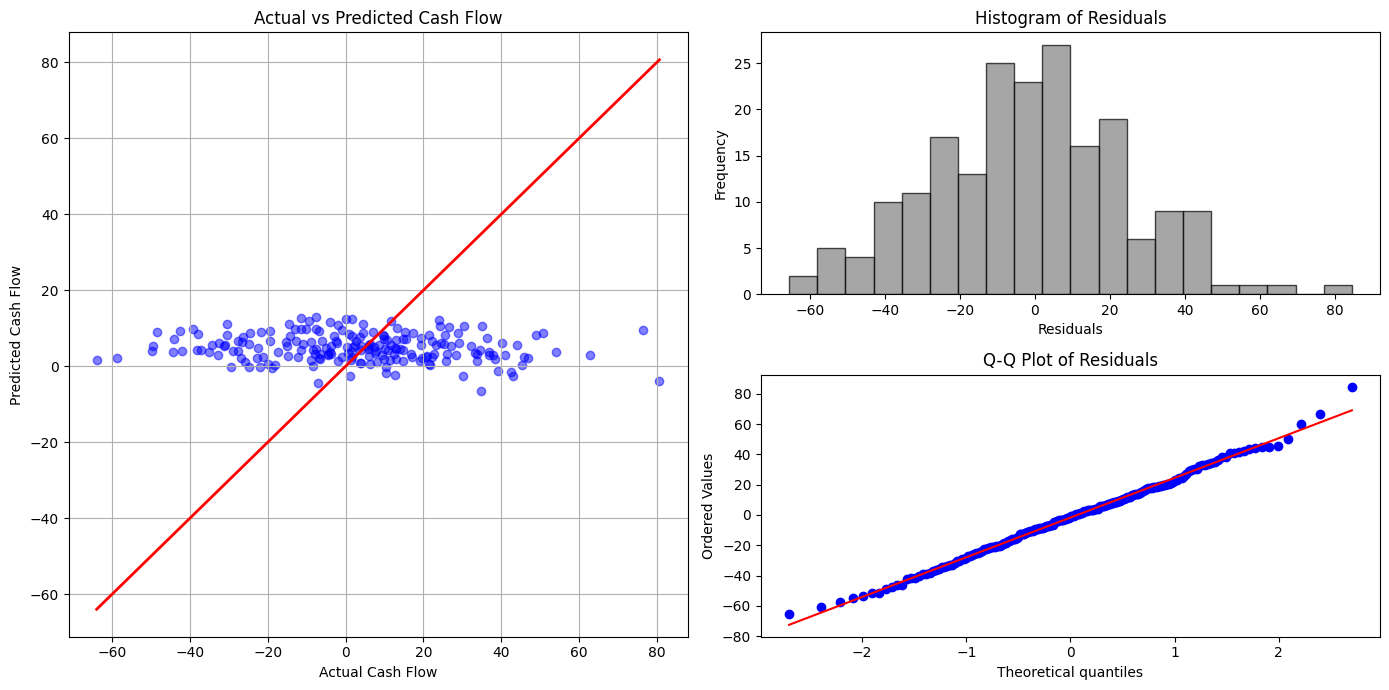

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import scipy.stats as stats

# Load data from CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Define features and target
def get_features_and_target(data):
    features = [
        'Revenue/Sales', 'Total Income', 'Tax', 'Net Profit', 'Accounts Receivable',
        'Accounts Payable', 'EBIT', 'Total Expenditure', 'Interest',
        'GDP Growth', 'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure',
        'Seasonality', 'Client Payment Trends'
    ]
    target = 'Cash Flow'
    return data[features], data[target]

# Add a constant term for the intercept
def add_intercept(X):
    return sm.add_constant(X)

# Split the data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=0):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Create and train the OLS regression model
def train_ols_model(X_train, y_train):
    model = sm.OLS(y_train, X_train).fit()
    return model

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    residuals = y_test - y_pred
    return y_pred, mse, r2, residuals

# Plot the results
def plot_results(y_test, y_pred, residuals):
    plt.figure(figsize=(14, 7))

    # Actual vs Predicted Plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.xlabel('Actual Cash Flow')
    plt.ylabel('Predicted Cash Flow')
    plt.title('Actual vs Predicted Cash Flow')
    plt.grid(True)

    # Histogram of Residuals
    plt.subplot(2, 2, 2)
    plt.hist(residuals, bins=20, color='gray', edgecolor='black', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')

    # Q-Q Plot for Normality
    plt.subplot(2, 2, 4)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

def main():
    # File path
    file_path = '/content/cash_flow_data_ final.csv'

    # Load data
    data = load_data(file_path)

    # Extract features and target
    X, y = get_features_and_target(data)

    # Add a constant term for the intercept
    X = add_intercept(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Create and train the OLS regression model
    model = train_ols_model(X_train, y_train)

    # Print model summary
    print(model.summary())

    # Evaluate the model
    y_pred, mse, r2, residuals = evaluate_model(model, X_test, y_test)

    # Print performance metrics
    print(f'MSE: {mse}')
    print(f'R^2: {r2}')

    # Plot the results
    plot_results(y_test, y_pred, residuals)

if __name__ == "__main__":
    main()
